In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
df['Species'].describe()

count       159
unique        7
top       Perch
freq         56
Name: Species, dtype: object

In [8]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

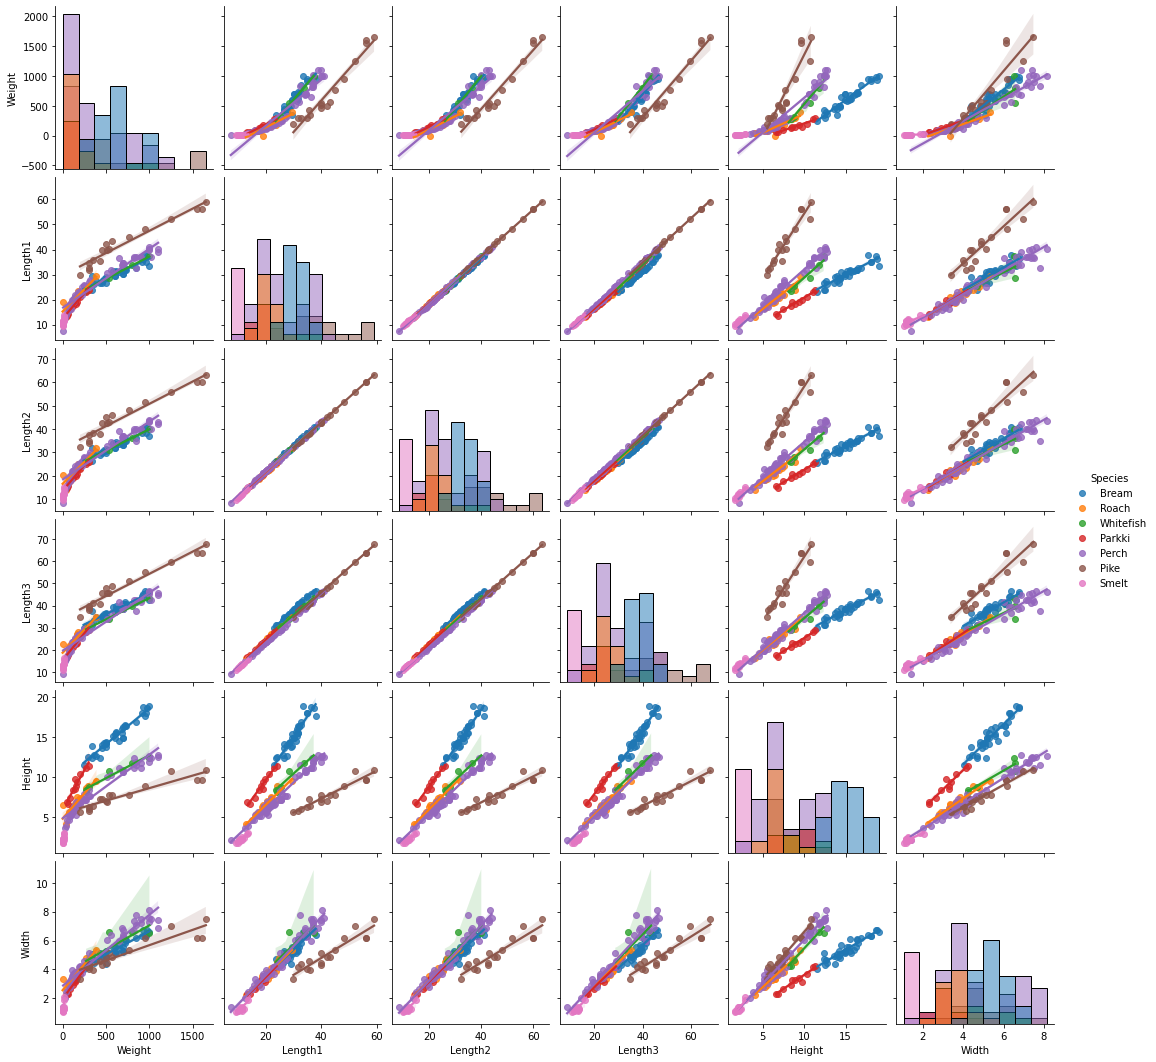

In [9]:
sns.pairplot(df,kind='reg',hue='Species',diag_kind='hist')

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

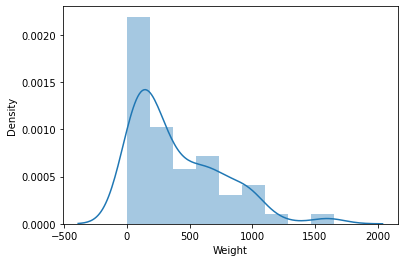

In [10]:
sns.distplot(df['Weight'])

# Removing the skewness

In [11]:
np.sqrt(df['Weight']).skew()

0.2277490658754433

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


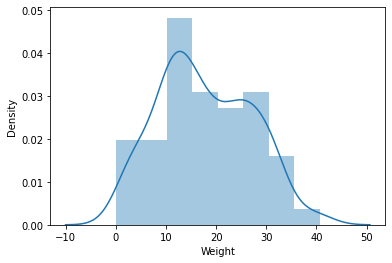

In [12]:
sns.distplot(np.sqrt(df['Weight']))
df['Weight']=np.sqrt(df['Weight'])

In [13]:
df['Weight'].skew()

0.2277490658754433

In [14]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,15.556349,23.2,25.4,30.0,11.5200,4.0200
1,Bream,17.029386,24.0,26.3,31.2,12.4800,4.3056
2,Bream,18.439089,23.9,26.5,31.1,12.3778,4.6961
3,Bream,19.052559,26.3,29.0,33.5,12.7300,4.4555
4,Bream,20.736441,26.5,29.0,34.0,12.4440,5.1340


In [15]:
X=df.drop(columns=['Weight','Species'])
y=df['Weight']

In [16]:
X

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [17]:
y

0      15.556349
1      17.029386
2      18.439089
3      19.052559
4      20.736441
         ...    
154     3.492850
155     3.660601
156     3.492850
157     4.438468
158     4.460942
Name: Weight, Length: 159, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()

In [20]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-3.05788578e-01, -2.82303007e-01, -1.06020232e-01,
         5.96578670e-01, -2.36528948e-01],
       [-2.25507242e-01, -1.98053663e-01, -2.33668373e-03,
         8.21260549e-01, -6.65789457e-02],
       [-2.35542409e-01, -1.79331587e-01, -1.09769794e-02,
         7.97341291e-01,  1.65793169e-01],
       [ 5.30159764e-03,  5.46943678e-02,  1.96390116e-01,
         8.79771455e-01,  2.26210031e-02],
       [ 2.53719316e-02,  5.46943678e-02,  2.39591594e-01,
         8.12834979e-01,  4.26371272e-01],
       [ 5.54774324e-02,  1.20221635e-01,  3.00073664e-01,
         1.08395111e+00,  3.03431249e-01],
       [ 5.54774324e-02,  1.20221635e-01,  2.82793073e-01,
         1.21901769e+00,  5.12357880e-01],
       [ 1.35758768e-01,  1.48304750e-01,  3.25994551e-01,
         8.65728838e-01,  1.62163285e-01],
       [ 1.35758768e-01,  1.48304750e-01,  3.34634847e-01,
         1.17815367e+00,  2.53683979e-01],
       [ 2.26075271e-01,  2.13832017e-01,  4.29678099e-01,
         1.23004114e+00

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
Lin_reg=LinearRegression()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=3)

In [25]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(127, 5) (32, 5) (127,) (32,)


In [26]:
Lin_reg.fit(X_train,y_train)

LinearRegression()

In [27]:
Lin_reg.score(X_train,y_train)

0.9816963825478677

In [28]:
Lin_reg.score(X_test,y_test)

0.9349895736347689

## Creating the pipeline

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
my_pipeline=Pipeline([
     ('imputer',SimpleImputer(strategy="mean")),
    #... we can add as many as we want
    ('std_scaler',StandardScaler()),
])

In [32]:
X_scaled=my_pipeline.fit_transform(X)

In [52]:
X_scaled

array([[-3.05788578e-01, -2.82303007e-01, -1.06020232e-01,
         5.96578670e-01, -2.36528948e-01],
       [-2.25507242e-01, -1.98053663e-01, -2.33668373e-03,
         8.21260549e-01, -6.65789457e-02],
       [-2.35542409e-01, -1.79331587e-01, -1.09769794e-02,
         7.97341291e-01,  1.65793169e-01],
       [ 5.30159764e-03,  5.46943678e-02,  1.96390116e-01,
         8.79771455e-01,  2.26210031e-02],
       [ 2.53719316e-02,  5.46943678e-02,  2.39591594e-01,
         8.12834979e-01,  4.26371272e-01],
       [ 5.54774324e-02,  1.20221635e-01,  3.00073664e-01,
         1.08395111e+00,  3.03431249e-01],
       [ 5.54774324e-02,  1.20221635e-01,  2.82793073e-01,
         1.21901769e+00,  5.12357880e-01],
       [ 1.35758768e-01,  1.48304750e-01,  3.25994551e-01,
         8.65728838e-01,  1.62163285e-01],
       [ 1.35758768e-01,  1.48304750e-01,  3.34634847e-01,
         1.17815367e+00,  2.53683979e-01],
       [ 2.26075271e-01,  2.13832017e-01,  4.29678099e-01,
         1.23004114e+00

In [69]:
X_test

array([[-0.26564791, -0.30102508, -0.28746644, -0.44103033, -0.30436613],
       [ 0.0053016 ,  0.05469437,  0.19639012,  0.87977146,  0.022621  ],
       [-0.72726559, -0.74099388, -0.72812152, -0.58412461, -0.63426908],
       [ 0.87836112,  0.943993  ,  1.10362116,  2.13284102,  1.11545426],
       [-0.32585891, -0.31974716, -0.27882614,  0.49547182, -0.16274113],
       [-0.12515557, -0.1325264 , -0.05417846, -0.09431811,  0.21191055],
       [ 0.55723578,  0.61635666,  0.83577199,  1.72934981,  0.97335321],
       [ 0.05547743,  0.12022164,  0.28279307,  1.21901769,  0.51235788],
       [-0.68712492, -0.69418869, -0.65035886, -0.66852074, -0.66836619],
       [-0.64698425, -0.6473835 , -0.61579767,  0.17913846, -0.75000884],
       [ 0.31639177,  0.33552551,  0.51608106,  1.51356159,  0.69176938],
       [ 1.39015464,  1.36523971,  1.23322559,  0.82886697,  1.78460265],
       [ 0.1558291 ,  0.14830475,  0.0322245 , -0.31722126,  0.21072043],
       [-0.80754693, -0.80652115, -0.7

## Evaluating the model

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
y_prediction=Lin_reg.predict(X_scaled)

In [36]:
mse=mean_squared_error(y_prediction,y)
rmse=np.sqrt(mse)

In [37]:
rmse

1.4991851147601898

## Saving the model

In [38]:
from joblib import dump,load

In [39]:
dump(Lin_reg,'Fish_market.joblib')

['Fish_market.joblib']